In [1]:
import json
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
  
# Opening JSON file
f = open('data.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
df = pd.DataFrame(data)

[nltk_data] Downloading package wordnet to /Users/ellaxu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df.head(2)

,repo,language,readme_contents
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w..."


In [3]:
import unicodedata
import re
import json
import os

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
from time import strftime

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matt_prepare as prepare

In [5]:
df = prepare.clean_df()

In [6]:
train, validate, test = prepare.split_data(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             269 non-null    object
 1   language         269 non-null    object
 2   readme_contents  269 non-null    object
 3   clean            269 non-null    object
 4   stemmed          269 non-null    object
 5   lemmatized       269 non-null    object
 6   character_count  269 non-null    int64 
 7   word_count       269 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 18.9+ KB


In [8]:
df

,repo,language,readme_contents,clean,stemmed,lemmatized,character_count,word_count
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...,codeup setup script setup script codeup studen...,codeup setup script setup script codeup studen...,codeup setup script setup script codeup studen...,1062,119
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w...",movies application project building single pag...,movi applic project build singl page movi appl...,movie application project building single page...,2888,411
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,linux kernel several guides kernel developers ...,linux kernel sever guid kernel develop user gu...,linux kernel several guide kernel developer us...,505,58
4,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...,introduct second program assign requir write r...,introduction second programming assignment req...,2488,332
5,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,well hello repositori meant provid exampl fork...,well hello repository meant provide example fo...,519,60
...,...,...,...,...,...,...,...,...
296,golang/go,Go,# The Go Programming Language\n\nGo is an open...,go programming language go open source program...,go program languag go open sourc program langu...,go programming language go open source program...,1062,111
297,TheOdinProject/css-exercises,HTML,# CSS Exercises\n\nThese exercises are a serie...,css exercises exercises series css related tas...,css exercis exercis seri css relat task intend...,cs exercise exercise series cs related task in...,2279,301
298,selfteaching/the-craft-of-selfteaching,Jupyter Notebook,# the-craft-of-selfteaching\n\n> One has no fu...,thecraftofselfteaching one future one couldnt ...,thecraftofselfteach one futur one couldnt teac...,thecraftofselfteaching one future one couldnt ...,2961,102
299,netty/netty,Java,![Build project](https://github.com/netty/nett...,build projecthttpsgithubcomnettynettyworkflows...,build projecthttpsgithubcomnettynettyworkflows...,build projecthttpsgithubcomnettynettyworkflows...,1950,179


## Question 1: What are the most common languages from the repos we explored?


In [9]:
import visualization

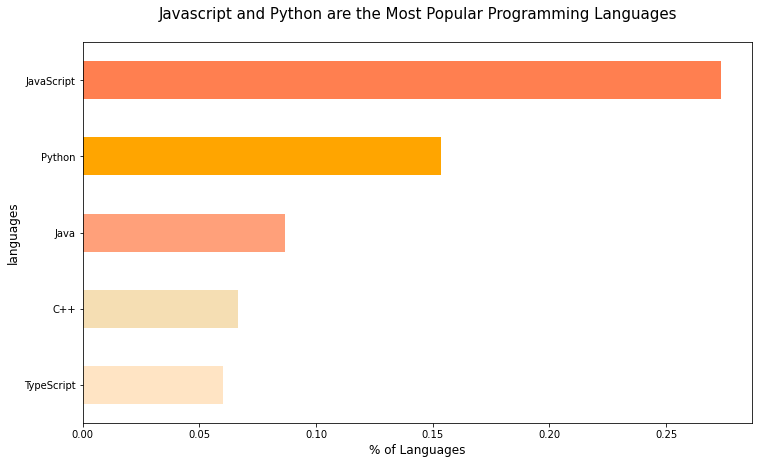

In [10]:
visualization.top_languages(train)

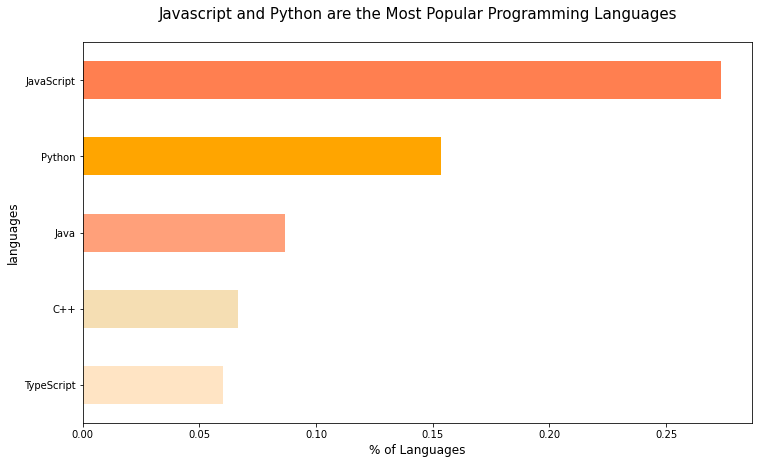

In [8]:
# creating language freq barplot (horizontal)
train.language.value_counts(ascending = True, normalize = True).tail().plot.barh(color =\
                                                    ['bisque', 'wheat', 'lightsalmon', 'orange', \
                                                    'coral'],figsize = (12, 7))
# adding title
plt.xlabel('% of Languages',fontsize=12)# set up the x axis. 
plt.ylabel('languages',fontsize=12)# set up the y axis
plt.title('Javascript and Python are the Most Popular Programming Languages\n',fontsize=15)
plt.show()



## Question 2: What are the most common words across all READme's?

In [9]:
def get_word_counts_series(df, column):
    '''
    This function takes in a dataframe
    and the column you want to create the word counts of
    returns a series of the words and their counts
    You can get the top 20 or whatever from that later
    '''
    words = ' '.join(df[column])
    
    words_list = words.split()
    
    word_counts = pd.Series(words_list).value_counts()
    
    return word_counts

In [10]:
all_word_counts = get_word_counts_series(train, 'lemmatized')
javascript_word_counts = get_word_counts_series(train[train.language == 'JavaScript'], 'lemmatized')
java_word_counts = get_word_counts_series(train[train.language == 'Java'], 'lemmatized')
python_word_counts = get_word_counts_series(train[train.language == 'Python'], 'lemmatized')
typescript_word_counts = get_word_counts_series(train[train.language == 'TypeScript'], 'lemmatized')
c_word_counts = get_word_counts_series(train[train.language == 'C++'], 'lemmatized')

In [11]:
# create list of all the previous counts
word_counts_list = [javascript_word_counts,java_word_counts, python_word_counts, typescript_word_counts,c_word_counts,  all_word_counts]

# create list of names for columns
column_names = ['javascript', 'java','python','typescript','C++','all']


# create list of languages
languages = list(df.language.unique())

In [36]:
# create dataframe of the counts. 
word_counts = pd.concat(word_counts_list, axis=1).fillna(0).astype(int)
word_counts.columns = column_names
word_counts.head(10)

,javascript,java,python,typescript,C++,all
const,369,0,0,7,0,379
function,353,0,9,19,0,428
javascript,337,1,0,7,3,374
use,280,20,76,30,18,594
file,267,14,47,8,13,559
bad,258,0,0,0,0,258
good,254,2,1,2,0,274
1,240,4,249,19,6,694
return,216,2,3,11,0,268
value,208,0,14,26,0,279


In [37]:
df_python = train[train.language == 'Python']
df_js = train[train.language == 'JavaScript']
df_java = train[train.language == 'Java']
df_c = train[train.language == 'C++']
df_type = train[train.language == 'TypeScript']


In [38]:
all_words = ' '.join(train.lemmatized.astype(str))
python_words = ' '.join(df_python.lemmatized.astype(str))
js_words = ' '.join(df_js.lemmatized.astype(str))
java_words = ' '.join(df_java.lemmatized.astype(str))
c_words = ' '.join(df_c.lemmatized.astype(str))
type_words = ' '.join(df_type.lemmatized.astype(str))


In [40]:
df_all_count = pd.DataFrame(pd.Series(all_words.split()).value_counts(), columns = ['all_word_cnt']).head(10)

# word frequency
df_all_count['all_word_freq'] = pd.Series(all_words.split()).value_counts(normalize = True).head(10)
df_python_count = pd.DataFrame(pd.Series(python_words.split()).value_counts(), columns = ['python_word_cnt']).head(25)

# word frequency
df_python_count['python_word_freq'] = pd.Series(python_words.split()).value_counts(normalize = True).head(10)
# creating a df for the word count and frequency
# word count
df_js_count = pd.DataFrame(pd.Series(js_words.split()).value_counts(), columns = ['js_word_cnt']).head(10)

# word frequency
df_js_count['js_word_freq'] = pd.Series(js_words.split()).value_counts(normalize = True).head(10)

# creating a df for the word count and frequency
# word count
df_java_count = pd.DataFrame(pd.Series(java_words.split()).value_counts(), columns = ['java_word_cnt']).head(10)

# word frequency
df_java_count['java_word_freq'] = pd.Series(java_words.split()).value_counts(normalize = True).head(10)
# creating a df for the word count and frequency
# word count
df_c_count = pd.DataFrame(pd.Series(c_words.split()).value_counts(), columns = ['c_word_cnt']).head(10)

# word frequency
df_c_count['c_word_freq'] = pd.Series(c_words.split()).value_counts(normalize = True).head(10)
df_type_count = pd.DataFrame(pd.Series(type_words.split()).value_counts(), columns = ['type_word_cnt']).head(10)

# word frequency
df_type_count['type_word_freq'] = pd.Series(type_words.split()).value_counts(normalize = True).head(10)

df_word_counts = pd.concat([df_all_count.all_word_freq, df_python_count.python_word_freq,\
        df_js_count.js_word_freq, df_java_count.java_word_freq,\
        df_c_count.c_word_freq, df_type_count.type_word_freq], axis = 1).fillna(0)


IndexError: index 0 is out of bounds for axis 0 with size 0

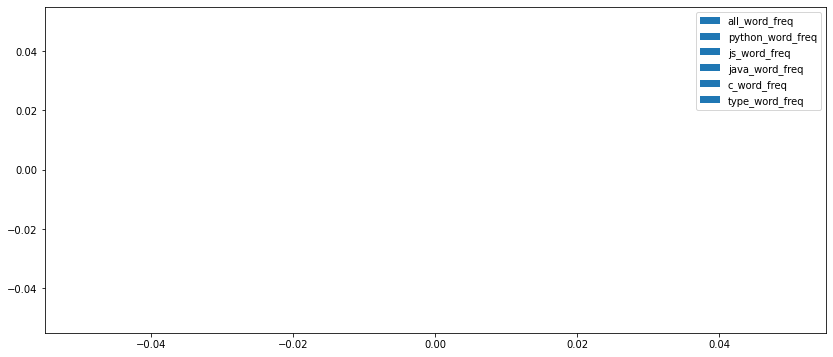

In [41]:
df_word_counts[(df_word_counts.python_word_freq > 0) & (df_word_counts.js_word_freq > 0)\
                & (df_word_counts.java_word_freq > 0) & (df_word_counts.c_word_freq > 0)\
                & (df_word_counts.type_word_freq > 0)].sort_values(by = 'all_word_freq').plot.\
                            barh(figsize = (14, 6), stacked = True, \
                                                color = ['grey', 'orange', 'blue', 'pink', \
                                                        'yellow', 'green'])


IndexError: index 0 is out of bounds for axis 0 with size 0

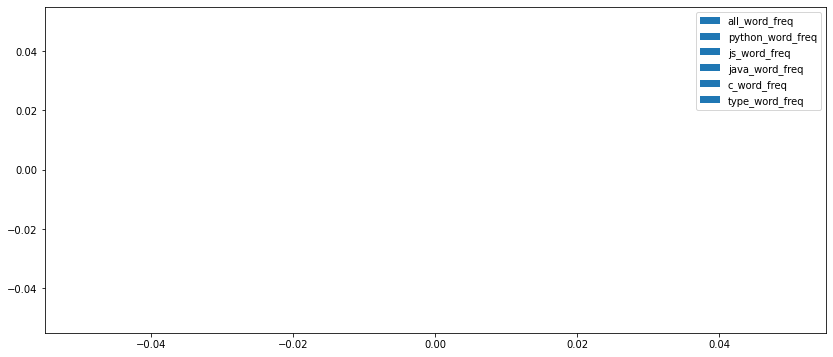

In [16]:
import matplotlib.pyplot as plt
common_words(train)
plt.title('Commonly Used Words Across All Languages\n')
plt.xlabel('Frequency',fontsize=15)# set up the x axis. 
plt.ylabel('Words',fontsize=15)# set up the y axis
plt.show()

In [32]:
def top_25_freq(train):
    '''
    This function takes in the train dataframe and splits the data by language, creating a df of the top 
    25 words in each language, along with their counts and frequencies. It then plots the frequencies of each
    word that appears across the top 25 words for each language.
    '''

    # combining the text strings for each language

    # creating dfs
    df_python = train[train.language == 'Python']
    df_js = train[train.language == 'JavaScript']
    df_java = train[train.language == 'Java']
    df_c = train[train.language == 'C#']
    df_type = train[train.language == 'TypeScript']

    # generating text strings for each df
    all_words = ' '.join(train.lemmatized.astype(str))
    python_words = ' '.join(df_python.lemmatized.astype(str))
    js_words = ' '.join(df_js.lemmatized.astype(str))
    java_words = ' '.join(df_java.lemmatized.astype(str))
    c_words = ' '.join(df_c.lemmatized.astype(str))
    type_words = ' '.join(df_type.lemmatized.astype(str))

    # creating a df for the word count and frequency
    # word count
    df_all_count = pd.DataFrame(pd.Series(all_words.split()).value_counts(), columns = ['all_word_cnt']).head(25)

    # word frequency
    df_all_count['all_word_freq'] = pd.Series(all_words.split()).value_counts(normalize = True).head(25)

    ############################################

    # creating a df for the word count and frequency
    # word count
    df_python_count = pd.DataFrame(pd.Series(python_words.split()).value_counts(), columns = ['python_word_cnt']).head(25)

    # word frequency
    df_python_count['python_word_freq'] = pd.Series(python_words.split()).value_counts(normalize = True).head(25)

    ############################################

    # creating a df for the word count and frequency
    # word count
    df_js_count = pd.DataFrame(pd.Series(js_words.split()).value_counts(), columns = ['js_word_cnt']).head(25)

    # word frequency
    df_js_count['js_word_freq'] = pd.Series(js_words.split()).value_counts(normalize = True).head(25)

    ############################################

    # creating a df for the word count and frequency
    # word count
    df_java_count = pd.DataFrame(pd.Series(java_words.split()).value_counts(), columns = ['java_word_cnt']).head(25)

    # word frequency
    df_java_count['java_word_freq'] = pd.Series(java_words.split()).value_counts(normalize = True).head(25)

    ############################################

    # creating a df for the word count and frequency
    # word count
    df_c_count = pd.DataFrame(pd.Series(c_words.split()).value_counts(), columns = ['c_word_cnt']).head(25)

    # word frequency
    df_c_count['c_word_freq'] = pd.Series(c_words.split()).value_counts(normalize = True).head(25)

    ############################################

    # creating a df for the word count and frequency
    # word count
    df_type_count = pd.DataFrame(pd.Series(type_words.split()).value_counts(), columns = ['type_word_cnt']).head(25)

    # word frequency
    df_type_count['type_word_freq'] = pd.Series(type_words.split()).value_counts(normalize = True).head(25)

    ###########################################################################

    # creating df of top 50 word frequencies for each language
    df_word_counts = pd.concat([df_all_count.all_word_freq, df_python_count.python_word_freq,\
          df_js_count.js_word_freq, df_java_count.java_word_freq,\
          df_c_count.c_word_freq, df_type_count.type_word_freq], axis = 1).fillna(0)

    # creating a df with the words that appear in the top 25 words for all languages
    df_word_counts[(df_word_counts.python_word_freq > 0) & (df_word_counts.js_word_freq > 0)\
                & (df_word_counts.java_word_freq > 0) & (df_word_counts.c_word_freq > 0)\
                & (df_word_counts.type_word_freq > 0)].sort_values(by = 'all_word_freq').plot.\
                            barh(figsize = (14, 6), stacked = True, \
                                                color = ['black', '#f3993aff', '#b7b7b7ff', '#A865C9', \
                                                        '#4a86e8ff', 'grey'])

    #plt.title('Bot, Use, and Using Commonly Used Across All Languages\n')
    #plt.show()

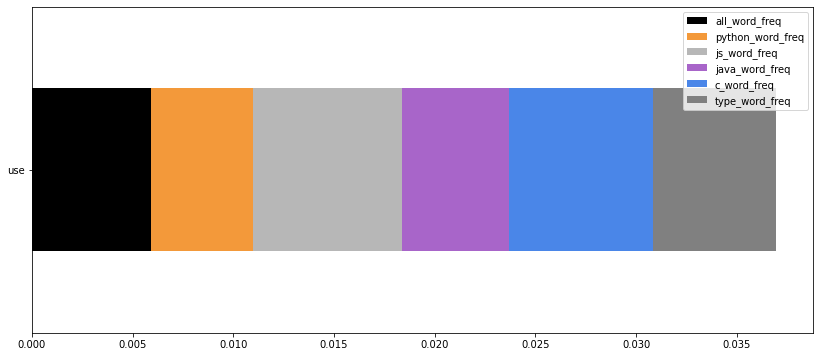

In [33]:
top_25_freq(train)

## Word Cloud

In [17]:

python_words = ''.join(str(train[train.language == 'Python'].lemmatized))
javascript_words = ''.join(str(train[train.language == 'JavaScript'].lemmatized))
c_words = ''.join(str(train[train.language == 'C++'].lemmatized))
java_words = ''.join(str(train[train.language == 'Java'].lemmatized))
typescript_words = ''.join(str(train[train.language == 'TypeScript'].lemmatized))

# generating text strings for each df
python_words = pd.Series(python_words.split()).value_counts()
javascript_words = pd.Series(javascript_words.split()).value_counts()
c_words = pd.Series(c_words.split()).value_counts()
java_words = pd.Series(java_words.split()).value_counts()
typescript_words = pd.Series(typescript_words.split()).value_counts()


In [18]:
word_counts = pd.concat([python_words, javascript_words, c_words, java_words, typescript_words], axis=1).fillna(0).astype(int)
word_counts.columns = ['python_words', 'javascript_words', 'c_words', 'java_words', 'typescript_words']
word_counts['all_words'] = word_counts.sum(axis=1)

In [19]:
word_counts

,python_words,javascript_words,c_words,java_words,typescript_words,all_words
aligncenter,5,7,1,0,6,19
django,4,0,0,0,0,4
web,4,2,0,0,0,6
flask,4,0,0,0,0,4
application,4,2,0,0,0,6
...,...,...,...,...,...,...
altionic,0,0,0,0,1,1
270,0,0,0,0,1,1
hrefhttpsechartsapacheorg,0,0,0,0,1,1
echarts,0,0,0,0,1,1


In [23]:
def wordcloud():
    ''' The function pushes a word cloud with the gitlogo as the background'''
  
    for column in word_counts.columns:
        plt.figure(figsize=(12,6))
        wc = WordCloud(background_color="white", width=800, height=400, 
                       contour_width=1, contour_color='black'
                )
        wc.generate_from_frequencies(word_counts[column])                    

    # show
        plt.title([column])
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    return


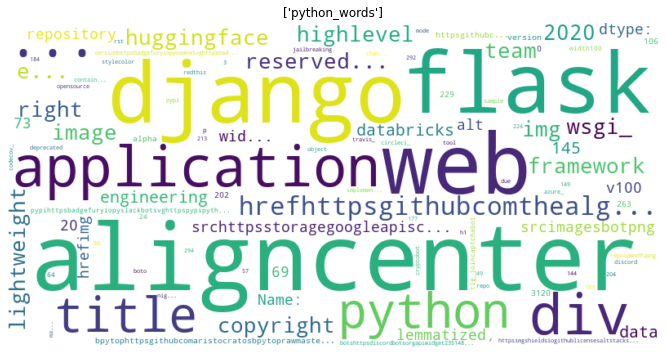

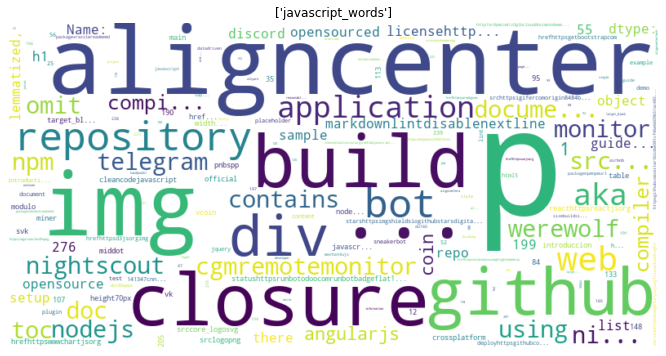

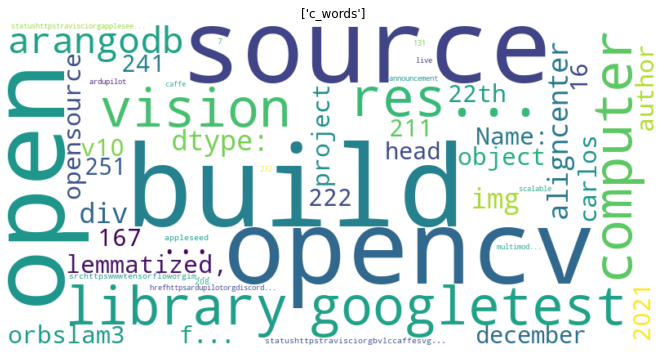

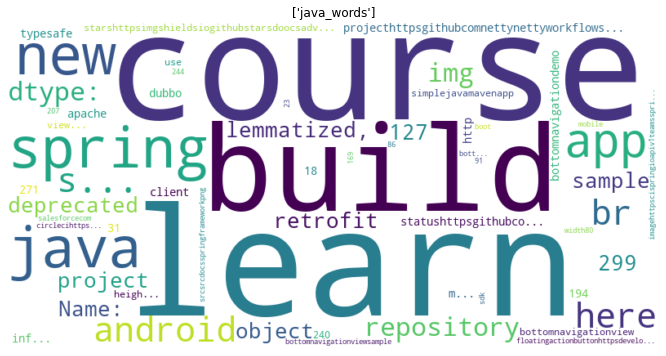

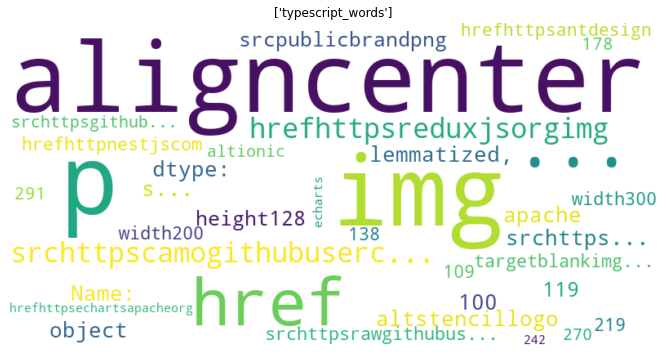

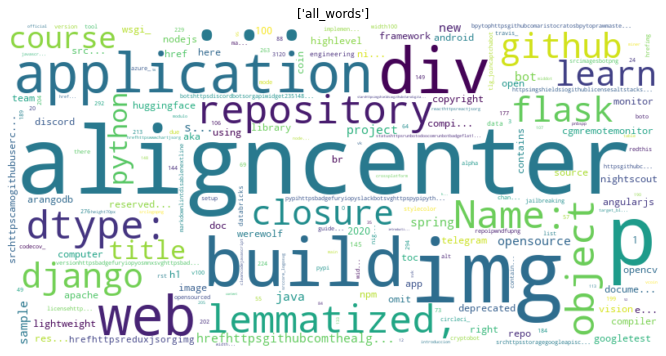

In [24]:
wordcloud()